In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats.stats import pearsonr
from patsy import dmatrices
from sklearn.metrics import classification_report

In [2]:
#Pushing Boundaries with Ensemble Models

In [3]:
data = pd.read_csv('adult.csv')
data.count(0)/data.shape[0]*100

age                100.0
workclass          100.0
fnlwgt             100.0
education          100.0
educational-num    100.0
marital_status     100.0
occupation         100.0
relationship       100.0
race               100.0
gender             100.0
capital-gain       100.0
capital-loss       100.0
hours_per_week     100.0
native_country     100.0
income             100.0
dtype: float64

We can see that the columns have a good fill rate. We'll remove the rows that have
empty values and also remove the education_num column as it contains the same
information, such as education and its unique codes:

In [4]:
data = data.dropna(how='any')
del data['educational-num']

Text(0, 0.5, 'Frequency')

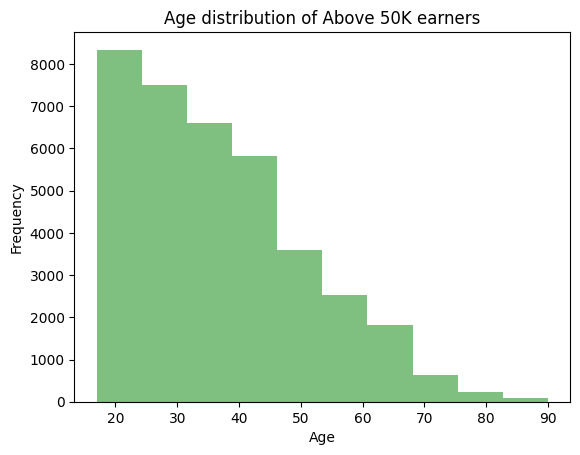

In [5]:
#Hypothesis 1: People who are older earn more
hist_above_50 = plt.hist(data[data.income == '<=50K'].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Age distribution of Above 50K earners')
plt.xlabel('Age')
plt.ylabel('Frequency')



Text(0, 0.5, 'Frequency')

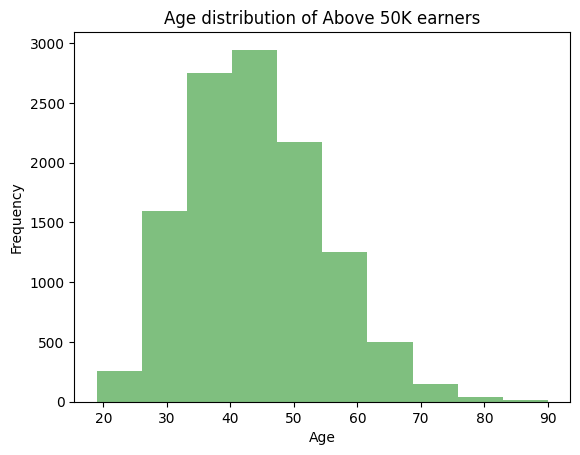

In [6]:
#Hypothesis 1: People who are older earn more 50>
hist_above_50 = plt.hist(data[data.income == '>50K'].age.values, 10, facecolor='green', alpha=0.5)
plt.title('Age distribution of Above 50K earners')
plt.xlabel('Age')
plt.ylabel('Frequency')



Text(0, 0.5, 'Percentage of People')

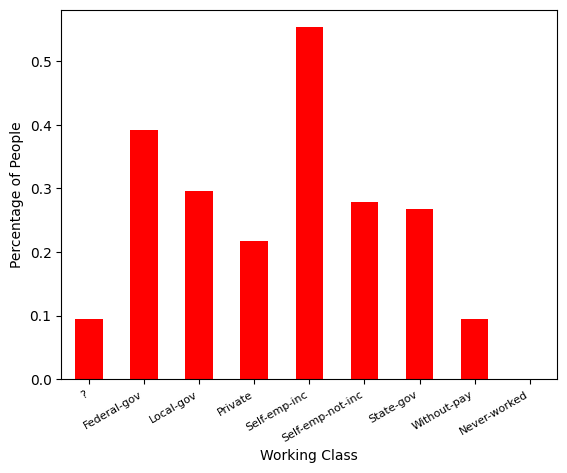

In [7]:
#Hypothesis 2: Income bias based on working class
dist_data = pd.concat([data[data.income == '>50K'].groupby('workclass').workclass.count(),
                       data[data.income == '<=50K'].groupby('workclass').workclass.count()], axis=1)

dist_data.columns = ['wk_class_gt50','wk_class_lt50']
dist_data_final = dist_data.wk_class_gt50/(dist_data.wk_class_lt50 + dist_data.wk_class_gt50)
dist_data_final.sort_values(ascending=False)
ax = dist_data_final.plot(kind='bar', color='r', y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')

ax.set_xlabel('Working Class')
ax.set_ylabel('Percentage of People')

                       

Text(0, 0.5, 'Percentage of People')

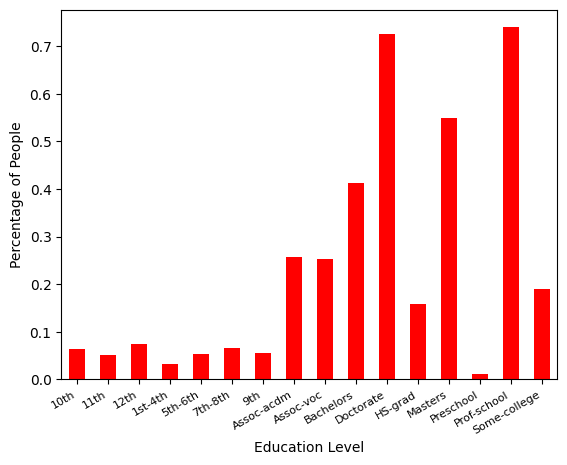

In [8]:
#Hypothesis 3: People with more education earn more
dist_data = pd.concat([data[data.income == '>50K'].groupby('education').education.count(),
                       data[data.income == '<=50K'].groupby('education').education.count()], axis=1)

dist_data.columns = ['education_gt50','education_lt50']
dist_data_final = dist_data.education_gt50 / (dist_data.education_gt50 + dist_data.education_lt50)

dist_data_final.sort_values(ascending=False)
ax = dist_data_final.plot(kind='bar', color='r')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Education Level')
ax.set_ylabel('Percentage of People')


We can see that the more the person is educated, the greater the number of people in
their group who earn more than $50K

Text(0, 0.5, 'Percentage of People')

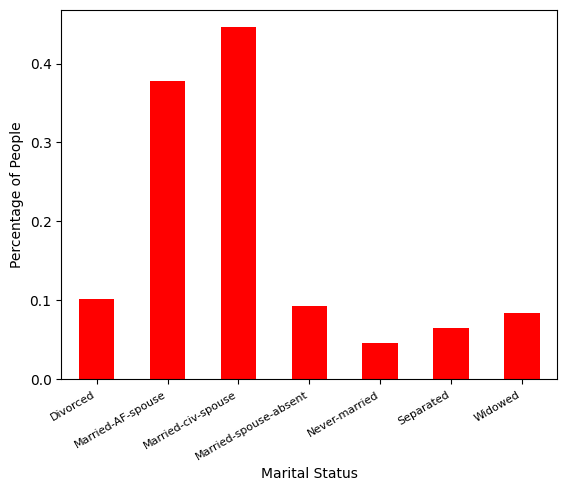

In [9]:
#Hypothesis 4: Married people tend to earn more
dist_data = pd.concat([data[data.income == '>50K'].groupby('marital_status').marital_status.count(),
                       data[data.income == '<=50K'].groupby('marital_status').marital_status.count()], axis=1)

dist_data.columns = ['marital_status_gt50','marital_status_lt50']

dist_data_final = dist_data.marital_status_gt50/(dist_data.marital_status_gt50+dist_data.marital_status_lt50)

dist_data_final.sort_values(ascending=False)

ax = dist_data_final.plot(kind='bar', color='r')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Percentage of People')


Text(0, 0.5, 'Percentage of People')

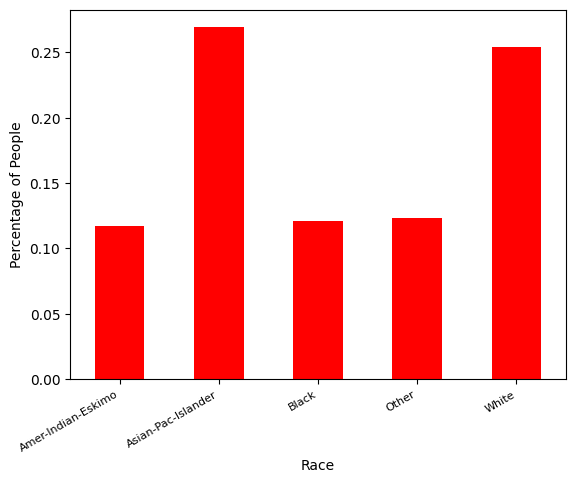

In [10]:
#Hypothesis 5: There is a bias in income based on race
dist_data = pd.concat([data[data.income == '>50K'].groupby('race').race.count(),
                       data[data.income == '<=50K'].groupby('race').race.count()], axis=1)

dist_data.columns = ['race_gt50','race_lt50']
dist_data_final = dist_data.race_gt50 / (dist_data.race_gt50 + dist_data.race_lt50)
dist_data_final.sort_values(ascending=False)
ax = dist_data_final.plot(kind='bar', color='r')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Race')
ax.set_ylabel('Percentage of People')

Text(0, 0.5, 'Percentage of People')

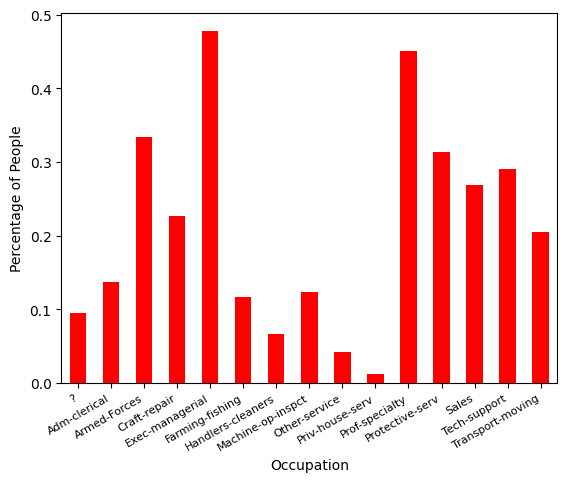

In [11]:
#Hypothesis 6: There is a bias in the income based on occupation
#Let's see how earning power is based on the occupation of a person:
dist_data = pd.concat([data[data.income == '>50K'].groupby('occupation').occupation.count(),
                       data[data.income == '<=50K'].groupby('occupation').occupation.count()], axis=1)

dist_data.columns = ['occupation_gt50','occupation_lt50']
dist_data_final = dist_data.occupation_gt50 / (dist_data.occupation_gt50 + dist_data.occupation_lt50)
dist_data_final.sort_values(ascending=False)
ax = dist_data_final.plot(kind='bar', color='r')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Occupation')
ax.set_ylabel('Percentage of People')

Text(0, 0.5, 'Percentage of People')

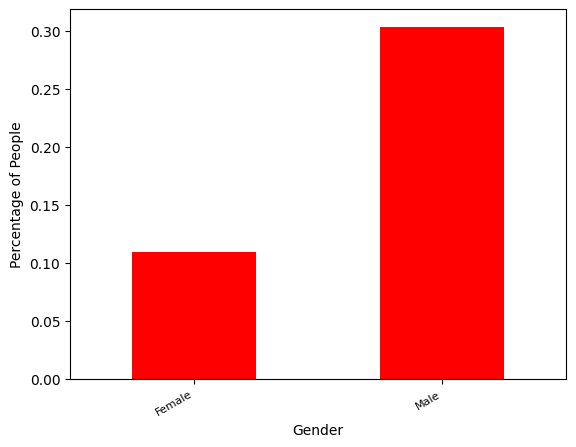

In [12]:
#Hypothesis 7: Men earn more
dist_data = pd.concat([data[data.income == '>50K'].groupby('gender').gender.count(),
                       data[data.income == '<=50K'].groupby('gender').gender.count()], axis=1)

dist_data.columns = ['gender_gt50','gender_lt50']
dist_data_final = dist_data.gender_gt50 / (dist_data.gender_gt50 + dist_data.gender_lt50)

dist_data_final.sort_values(ascending=False)
ax = dist_data_final.plot(kind='bar', color='r')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage of People')

Text(0.5, 1.0, 'Hours per week distribution of Above 50K earners')

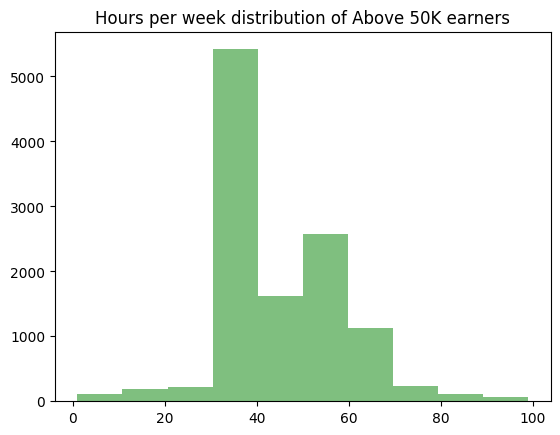

In [13]:
#Hypothesis 8: People who clock in more hours earn more

hist_above_50 = plt.hist(data[data.income == '>50K']
.hours_per_week.values, 10, facecolor='green', alpha=0.5)
plt.title('Hours per week distribution of Above 50K earners')

Text(0, 0.5, 'Percentage of People')

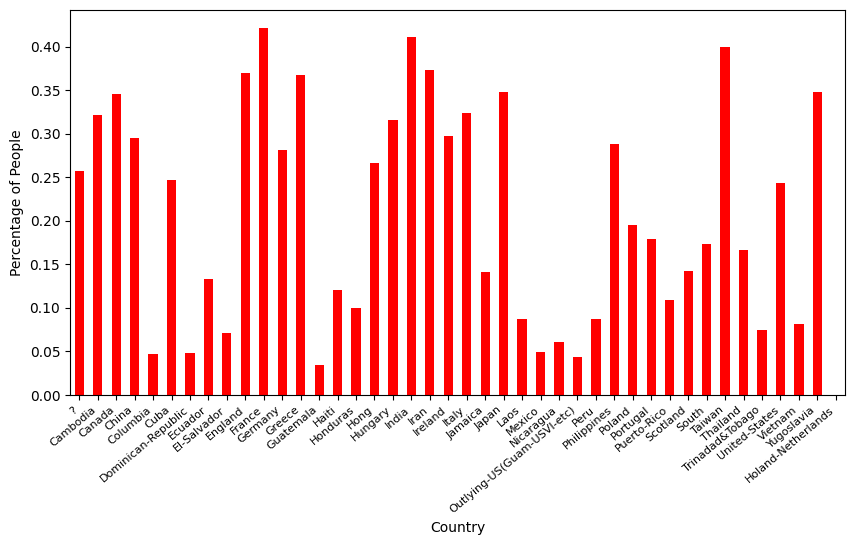

In [14]:
#Hypothesis 9: There is a bias in income based on the country of origin

plt.figure(figsize=(10,5))
dist_data = pd.concat([data[data.income == '>50K'].groupby('native_country').native_country.count(),
                       data[data.income == '<=50K'].groupby('native_country').native_country.count()], axis=1)
dist_data.columns = ['native_country_gt50','native_country_lt50']
dist_data_final = dist_data.native_country_gt50 / (dist_data.native_country_gt50 + dist_data.native_country_lt50 )
dist_data_final.sort_values(ascending = False)
ax = dist_data_final.plot(kind = 'bar', color = 'r')
ax.set_xticklabels(dist_data_final.index, rotation=40,
fontsize=8, ha='right')
ax.set_xlabel('Country')
ax.set_ylabel('Percentage of People')

In [20]:
#data.to_csv('census_test.csv')
#Decision trees
#Let's create a decision tree on the basis of our data to predict what the likelihood of aperson earning more than $50K is going to be:
data_test = pd.read_csv('census_test1.csv')
#df['lunch']=df['hour'].apply(lambda x: 1 if x >= 11 or x <= 1 else 0)
#data_test['greater'] = (data_test['income']<='<=50K')*1
#data_test.to_csv('census_test1.csv', index=False)
data_test = data_test.dropna(how='any')
data_test.head()
print(data_test['greater'].dtypes)

int64


In [16]:
formula = 'greater ~ age + workclass + education + marital_status + occupation + race + gender + native_country '
y_train,x_train = dmatrices(formula, data=data, return_type='dataframe')
y_test,x_test = dmatrices(formula, data=data_test,
return_type='dataframe')
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

PatsyError: Error evaluating factor: NameError: name 'greater' is not defined
    greater ~ age + workclass + education + marital_status + occupation + race + gender + native_country
    ^^^^^^^

In [21]:
y_pred = clf.predict(x_test)
print(pd.crosstab(y_test.greater)
,y_pred
,rownames = ['Actual']
,colnames = ['Predicted'])
print(classification_report(y_test.greater,y_pred))

NameError: name 'clf' is not defined

In [22]:
clf = sk.RandomForestClassifier(n_estimators=100,
oob_score=True,min_samples_split=5)
clf = clf.fit(x_train, y_train.greater)
y_pred = clf.predict(x_test)
print(pd.crosstab(y_test.greater)
,y_pred
,rownames = ['Actual']
,colnames = ['Predicted'])

(print classification_report(y_test.greater,y_pred))

SyntaxError: invalid syntax (2726681394.py, line 9)

In [ ]:
clf = sk.RandomForestClassifier(n_estimators=100,
oob_score=True,min_samples_split=5, min_samples_leaf= 2)
clf = clf.fit(x_train, y_train.greater)
y_pred = clf.predict(x_test)
print(pd.crosstab(y_test.greater)
,y_pred
,rownames = ['Actual']
,colnames = ['Predicted'])

print(classification_report(y_test.greater,y_pred))

In [ ]:
model_ranks = pd.Series(clf.feature_importances_,
index=x_train.columns, name='Importance')
.sort(ascending=False, inplace=False)
model_ranks.index.name = 'Features'
top_features = model_ranks.iloc[:31].sort(ascending=True,
inplace=False)
plt.figure(figsize=(15,7))
ax = top_features.plot(kind='barh')
_ = ax.set_title("Variable Ranking")
_ = ax.set_xlabel('Performance')
_ = ax.set_yticklabels(top_features.index, fontsize=8)